In [1]:
import pandas as pd
import numpy as np
import html
import lxml.etree as etree
from matplotlib import pyplot as plt
from collections import defaultdict

# Reading Data

In [2]:
# dataset_addr = "sample.xml"
dataset_addr = "dblp.xml"

In [3]:
parser = etree.XMLParser(recover=True)

In [4]:
tree = etree.parse(dataset_addr, parser=parser)

# Schema

In [ ]:
s = set()
for n in tree.getroot():
    for a in n:
        s.add(a.tag)

In [59]:
s

{<cyfunction Entity at 0x11142ff50>,
 'address',
 'author',
 'booktitle',
 'cdrom',
 'chapter',
 'cite',
 'crossref',
 'editor',
 'ee',
 'isbn',
 'journal',
 'month',
 'note',
 'number',
 'pages',
 'publisher',
 'school',
 'series',
 'title',
 'url',
 'volume',
 'year'}

In [60]:
len(tree.getroot())

7256826

In [65]:
t = set()
for n in tree.getroot():
    t.add(n.tag)

In [66]:
t

{'article',
 'book',
 'incollection',
 'inproceedings',
 'mastersthesis',
 'phdthesis',
 'proceedings',
 'www'}

In [68]:
u = defaultdict(set)
for n in tree.getroot():
    for a in n:
        u[n.tag].add(a.tag)

In [69]:
u

defaultdict(set,
            {'phdthesis': {'author',
              'ee',
              'isbn',
              'month',
              'note',
              'number',
              'pages',
              'publisher',
              'school',
              'series',
              'title',
              'url',
              'volume',
              'year'},
             'book': {<cyfunction Entity at 0x11142ff50>,
              'author',
              'booktitle',
              'cdrom',
              'cite',
              'crossref',
              'editor',
              'ee',
              'isbn',
              'month',
              'note',
              'pages',
              'publisher',
              'school',
              'series',
              'title',
              'url',
              'volume',
              'year'},
             'mastersthesis': {'author',
              'ee',
              'note',
              'school',
              'title',
              'year'},
             

# Creating Dataframe

In [5]:
rows = []
for node in tree.getroot():
    if node.tag in ["inproceedings", "article"]:
        year = node.find("year")
        if year != None:
            year = year.text
        rows.append({
            "title": node.find("title").text,
            "authors": [author.text for author in node.findall("author")],
            "year": year,
            "type": node.tag,
        })

In [6]:
len(rows)

4667239

In [7]:
df = pd.DataFrame(rows)

In [8]:
df

,title,authors,year,type
0,Generative Artificial Intelligence.,"[Tijn van der Zant, Matthijs Kouw, Lambert Sch...",2011,inproceedings
1,Practical Introspection as Inspiration for AI.,[Sam Freed],2011,inproceedings
2,'Quantum Linguistics' and Searle's Chinese Roo...,"[John Mark Bishop, Slawomir J. Nasuto, Bob Coe...",2011,inproceedings
3,Feasibility of Whole Brain Emulation.,[Anders Sandberg],2011,inproceedings
4,The New Experimental Science of Physical Cogni...,[Fabio Bonsignorio],2011,inproceedings
...,...,...,...,...
4667234,Interactive Support for Non-Programmers: The R...,"[E. F. Codd, C. J. Date]",1974,article
4667235,Common Subexpression Identification in General...,[Patrick A. V. Hall],1974,article
4667236,Catchment classification by runoff behaviour w...,"[Rita Ley, Markus Casper, Hugo Hellebrand, Ral...",2011,article
4667237,Relational Completeness of Data Base Sublangua...,[E. F. Codd],1972,article


In [9]:
df["num_of_authors"] = df["authors"].map(lambda x: len(x))

# Cleaning up Data

In [10]:
df[df["num_of_authors"] == 0]

,title,authors,year,type,num_of_authors
57,(error),[],None,article,0
58,(was never published),[],None,article,0
59,…,[],None,article,0
72,"The 1995 SQL Reunion: People, Project, and Pol...",[],1997,article,0
315,18. Workshop,[],1992,article,0
...,...,...,...,...,...
4661974,Continuous monitoring and the status quo effect.,[],2010,article,0
4662118,"Review of: ""Comparisons of three different met...",[],2010,article,0
4663561,The Next Killer Ap.,[],2006,article,0
4663799,Human-Computer Interaction in Radiotherapy Tar...,[],2011,article,0


In [11]:
df[df["year"].map(lambda x: x == None or len(x) != 4)]

,title,authors,year,type,num_of_authors
57,(error),[],None,article,0
58,(was never published),[],None,article,0
59,…,[],None,article,0


In [12]:
df[df["title"] == None]

,title,authors,year,type,num_of_authors


In [13]:
df[df["title"].map(lambda x: type(x) != str)]

,title,authors,year,type,num_of_authors
420,None,[Jutta Krei],1991,article,1
585,None,[Noam Paz],1989,article,1
594,None,[Carola Eschenbach],1988,article,1
7149,None,"[Kaori Kobayashi, Daisuke Kitayama, Kazutoshi ...",2011,inproceedings,3
7201,None,"[Junjun Yin, James D. Carswell]",2011,inproceedings,2
...,...,...,...,...,...
4661939,None,"[Steve G. Sutton, Matthew Holt, Vicky Arnold]",2016,article,3
4664576,None,"[Ladislav Marsik, Petr Martisek, Jaroslav Poko...",2018,article,9
4664689,None,"[Mira Kim, Shao-Ting Wang, David A. Ostrowski,...",2016,article,5
4664736,None,"[Shao-Ting Wang, Jennifer Jin, Pete Rivett, At...",2015,article,4


In [14]:
df = df[df["year"].map(lambda x: x != None and len(x) == 4)]

In [15]:
df = df[df["num_of_authors"] > 0]

In [16]:
df = df[df["title"] != None]

In [17]:
df = df[df["title"].map(lambda x: type(x) == str)]

In [18]:
df

,title,authors,year,type,num_of_authors
0,Generative Artificial Intelligence.,"[Tijn van der Zant, Matthijs Kouw, Lambert Sch...",2011,inproceedings,3
1,Practical Introspection as Inspiration for AI.,[Sam Freed],2011,inproceedings,1
2,'Quantum Linguistics' and Searle's Chinese Roo...,"[John Mark Bishop, Slawomir J. Nasuto, Bob Coe...",2011,inproceedings,3
3,Feasibility of Whole Brain Emulation.,[Anders Sandberg],2011,inproceedings,1
4,The New Experimental Science of Physical Cogni...,[Fabio Bonsignorio],2011,inproceedings,1
...,...,...,...,...,...
4667234,Interactive Support for Non-Programmers: The R...,"[E. F. Codd, C. J. Date]",1974,article,2
4667235,Common Subexpression Identification in General...,[Patrick A. V. Hall],1974,article,1
4667236,Catchment classification by runoff behaviour w...,"[Rita Ley, Markus Casper, Hugo Hellebrand, Ral...",2011,article,4
4667237,Relational Completeness of Data Base Sublangua...,[E. F. Codd],1972,article,1


# Save and Load Dataset

In [19]:
pd_addr = "articles.pkl"

In [20]:
df.to_pickle(pd_addr)

In [ ]:
df = pd.read_pickle(pd_addr)

# Data Analysis

## Over the Years

In [20]:
by_size = df.groupby("year").size()
by_size

year
1936        12
1937        14
1938        10
1939        18
1940        10
         ...  
2016    288795
2017    307977
2018    335049
2019    293650
2020      2339
Length: 85, dtype: int64

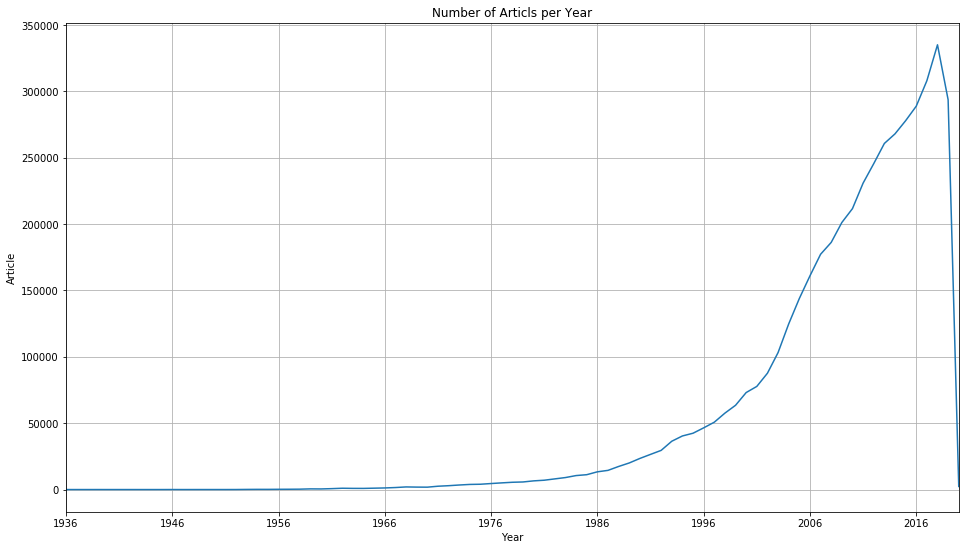

In [21]:
ax = by_size.plot(figsize=(16, 9))
ax.set_title("Number of Articls per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Article")
ax.grid()

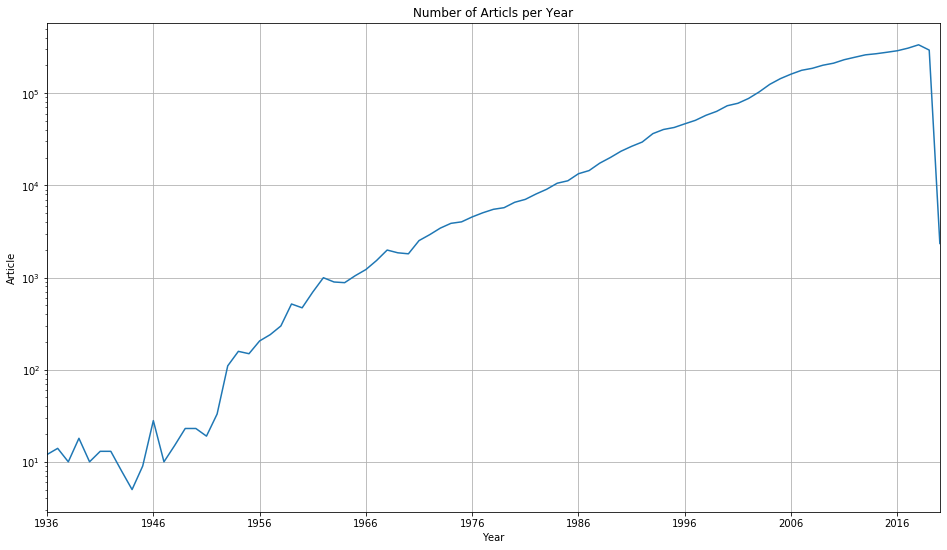

In [22]:
ax = by_size.plot(figsize=(16, 9))
ax.set_title("Number of Articls per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Article")
ax.set_yscale("log")
ax.grid()

## Number of Authors

In [23]:
num_of_authors_by_size = df.groupby("num_of_authors").size()
num_of_authors_by_size

num_of_authors
1       714996
2      1276772
3      1177290
4       746326
5       377497
        ...   
119          1
139          1
155          1
264          1
287          2
Length: 95, dtype: int64

In [24]:
df[df["num_of_authors"] >= 100]

,title,authors,year,type,num_of_authors
210012,An overview of the BlueGene/L Supercomputer.,"[Narasimha R. Adiga, George Alm, George S. Alm...",2002,inproceedings,115
538488,The Grid2003 Production Grid: Principles and P...,"[Ian T. Foster, Jerry Gieraltowski, Scott Gose...",2004,inproceedings,102
1137966,The Visual Object Tracking VOT2017 Challenge R...,"[Matej Kristan, Ales Leonardis, Jiri Matas, Mi...",2017,inproceedings,104
1209719,VisDrone-DET2018: The Vision Meets Drone Objec...,"[Pengfei Zhu, Longyin Wen, Dawei Du, Xiao Bian...",2018,inproceedings,105
1211050,The Sixth Visual Object Tracking VOT2018 Chall...,"[Matej Kristan, Ales Leonardis, Jiri Matas, Mi...",2018,inproceedings,155
1213086,The Visual Object Tracking VOT2016 Challenge R...,"[Matej Kristan, Ales Leonardis, Jiri Matas, Mi...",2016,inproceedings,139
2625699,Length Sensing and Control in the Virgo Gravit...,"[Fausto Acernese, P. Amico, M. Al-Shourbagy, S...",2006,article,119
3032755,The IceProd framework: Distributed data proces...,"[Mark G. Aartsen, Rasha U. Abbasi, Markus Acke...",2015,article,287
3264918,A promoter-level mammalian expression atlas.,"[The Fantom Consortium, RIKEN PMII, RIKEN CLST...",2014,article,264
3367833,Finding needles in haystacks: linking scientif...,"[Conrad L. Schoch, Barbara Robbertse, Vincent ...",2014,article,101


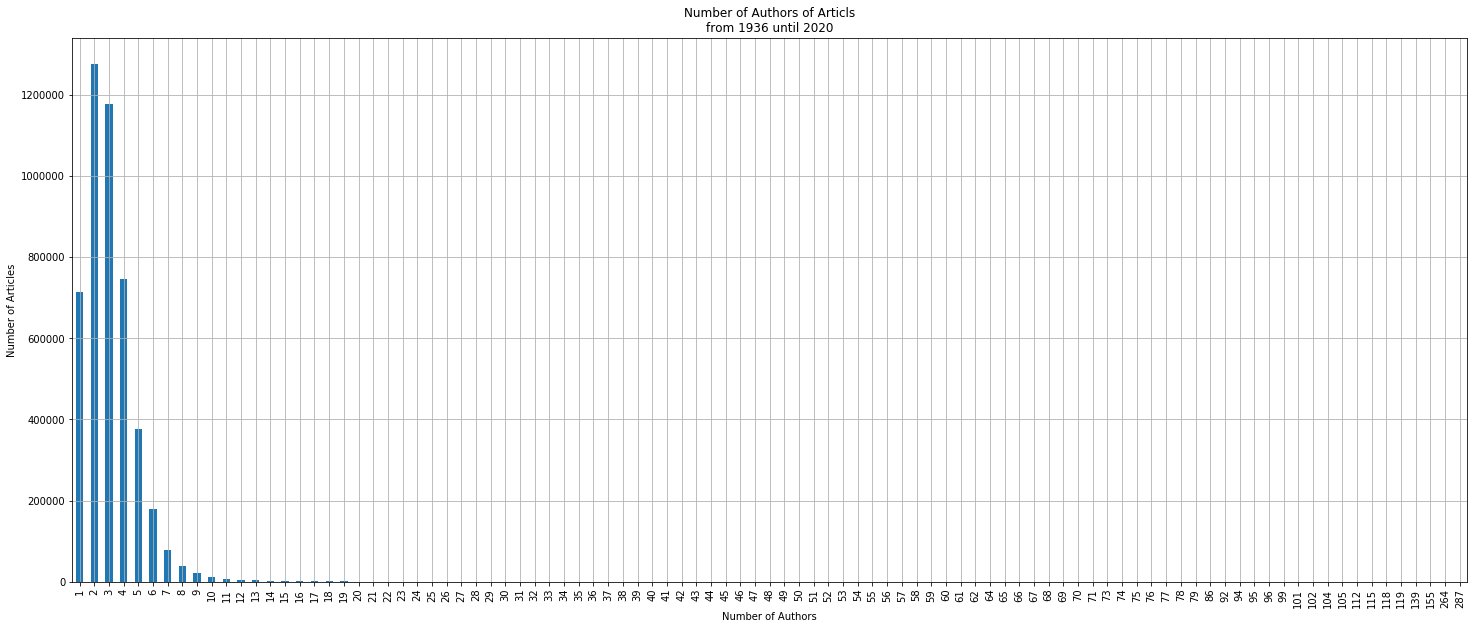

In [25]:
ax = num_of_authors_by_size.plot.bar(figsize=(25, 10))
ax.set_title("Number of Authors of Articls\nfrom 1936 until 2020")
ax.set_xlabel("Number of Authors")
ax.set_ylabel("Number of Articles")
ax.grid()

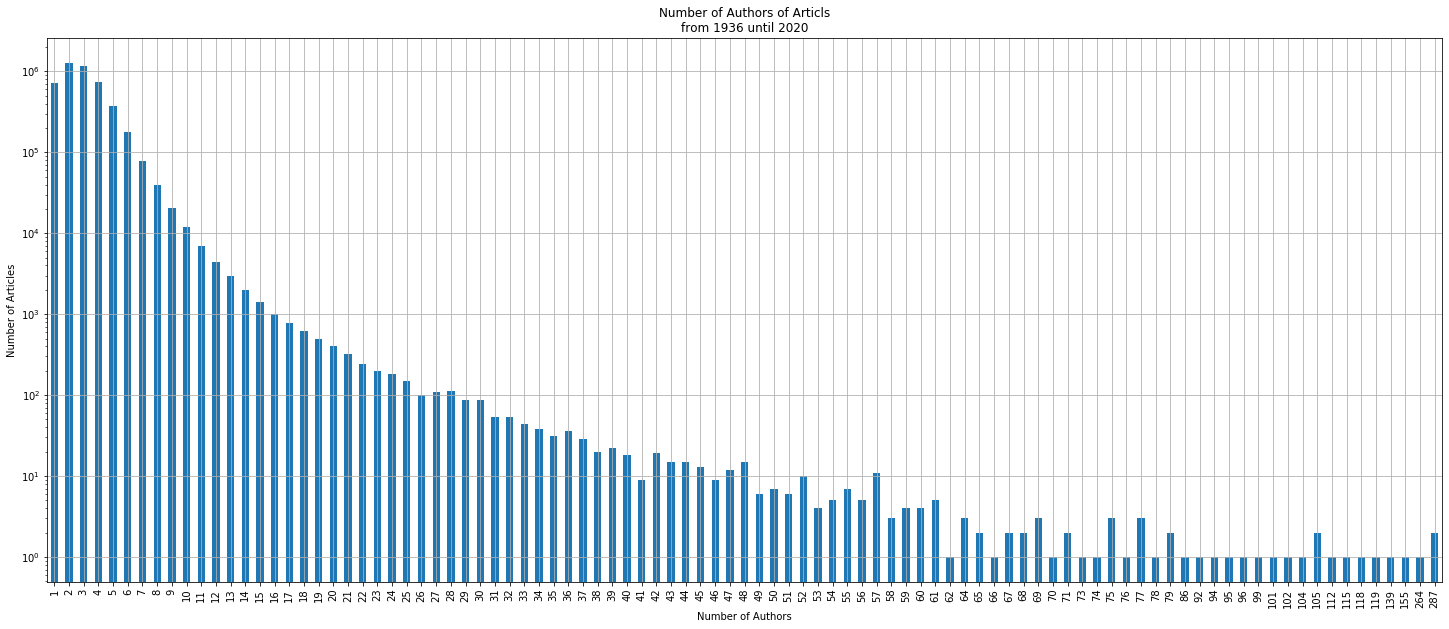

In [26]:
ax = num_of_authors_by_size.plot.bar(figsize=(25, 10))
ax.set_title("Number of Authors of Articls\nfrom 1936 until 2020")
ax.set_xlabel("Number of Authors")
ax.set_ylabel("Number of Articles")
ax.set_yscale("log")
ax.grid()

In [27]:
num_of_authors_by_size[num_of_authors_by_size >= 100]

num_of_authors
1      714996
2     1276772
3     1177290
4      746326
5      377497
6      179682
7       78180
8       39368
9       20579
10      12040
11       6866
12       4403
13       2971
14       2009
15       1428
16        993
17        787
18        615
19        499
20        406
21        321
22        242
23        199
24        181
25        151
26        101
27        110
28        112
dtype: int64

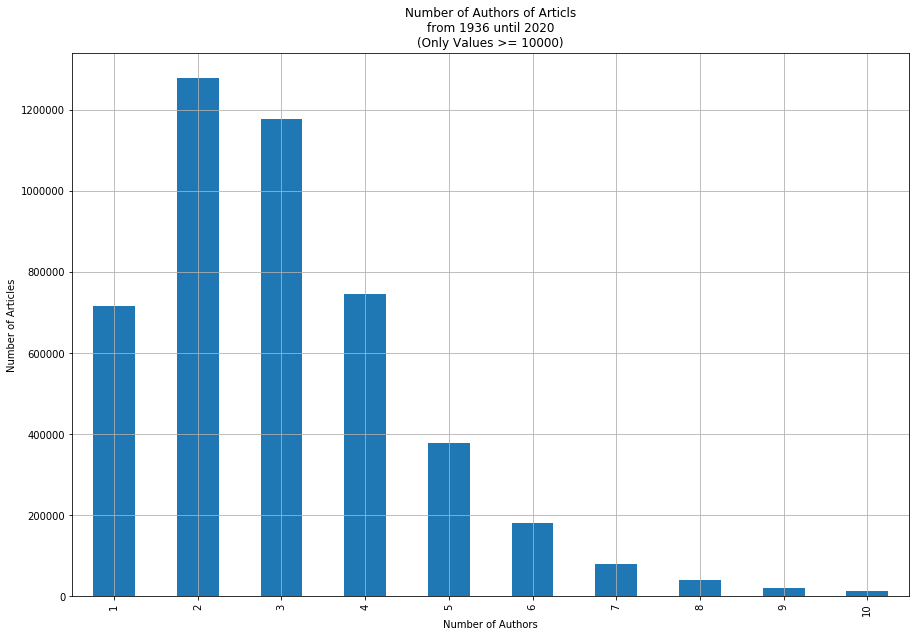

In [28]:
ax = num_of_authors_by_size[num_of_authors_by_size > 10000].plot.bar(figsize=(15, 10))
ax.set_title("Number of Authors of Articls\nfrom 1936 until 2020\n(Only Values >= 10000)")
ax.set_xlabel("Number of Authors")
ax.set_ylabel("Number of Articles")
ax.grid()

## Number of Authors over the Years

In [30]:
by_year_number_of_authors = df.groupby(["year", "num_of_authors"]).size()
by_year_number_of_authors

year  num_of_authors
1936  1                 12
1937  1                 14
1938  1                  9
      2                  1
1939  1                 18
                        ..
2020  8                 29
      9                  9
      10                 4
      11                 3
      16                 1
Length: 1493, dtype: int64

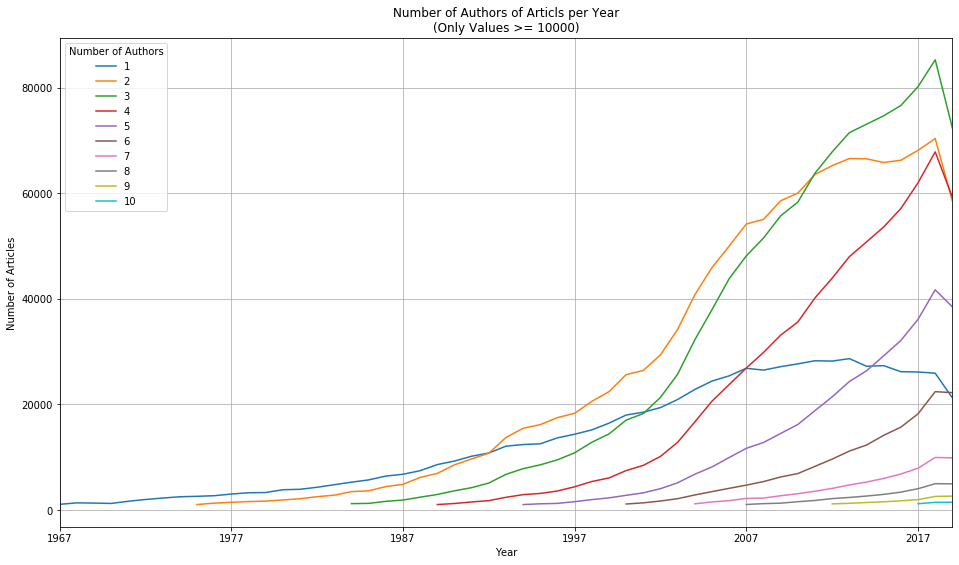

In [31]:
ax = by_year_number_of_authors[by_year_number_of_authors > 1000].unstack("num_of_authors").plot(figsize=(16, 9))
ax.set_title("Number of Authors of Articls per Year\n(Only Values >= 10000)")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Articles")
ax.grid()
ax.legend(title="Number of Authors")

In [32]:
by_year_number_of_authors[by_year_number_of_authors > 10000]

year  num_of_authors
1991  1                 10180
1992  1                 10786
      2                 10748
1993  1                 12081
      2                 13732
                        ...  
2019  2                 58512
      3                 72352
      4                 59225
      5                 38458
      6                 22224
Length: 118, dtype: int64

In [33]:
by_year_number_of_authors.unstack("num_of_authors")

num_of_authors,1,2,3,4,5,6,7,8,9,10,...,104,105,112,115,118,119,139,155,264,287
year,,,,,,,,,,,,,,,,,,,,,
1936,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1937,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1938,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1939,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1940,8.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,26185.0,66238.0,76604.0,57089.0,32104.0,15679.0,6809.0,3380.0,1733.0,965.0,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2017,26132.0,68123.0,80173.0,61961.0,36105.0,18210.0,7907.0,4027.0,1959.0,1179.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,25906.0,70339.0,85260.0,67819.0,41699.0,22403.0,9937.0,4976.0,2568.0,1440.0,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN


In [34]:
by_year_number_of_authors_percentage = by_year_number_of_authors.groupby("year").apply(lambda x: 100 * x / x.sum())
by_year_number_of_authors_percentage[by_year_number_of_authors_percentage > 0.5]

year  num_of_authors
1936  1                 100.000000
1937  1                 100.000000
1938  1                  90.000000
      2                  10.000000
1939  1                 100.000000
                           ...    
2020  4                  19.965797
      5                  12.783241
      6                   6.327490
      7                   2.821719
      8                   1.239846
Length: 435, dtype: float64

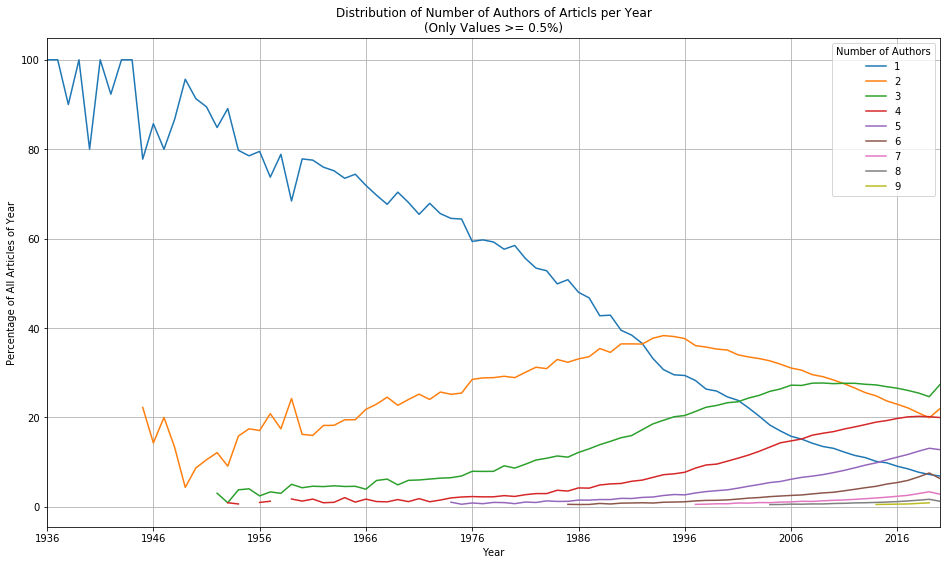

In [35]:
ax = by_year_number_of_authors_percentage[by_year_number_of_authors_percentage > 0.5].unstack("num_of_authors").plot(figsize=(16, 9))
ax.set_title("Distribution of Number of Authors of Articls per Year\n(Only Values >= 0.5%)")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of All Articles of Year")
ax.grid()
ax.legend(title="Number of Authors")

## By Author

In [36]:
del tree

In [ ]:
by_each_author = pd.DataFrame(df["authors"].tolist(), index=df["title"]).stack().reset_index(level=1, drop=True).reset_index(name="authors").rename(columns={"authors": "author"})
by_each_author = by_each_author.set_index("title").join(df.set_index("title")).reset_index()
by_each_author

In [137]:
# tmp = df[:1000]
# res = pd.DataFrame(tmp["authors"].tolist(), index=tmp["title"]).stack().reset_index(level=1, drop=True).reset_index(name="authors").rename(columns={"authors": "author"})
# res = res.set_index("title").join(tmp.set_index("title")).reset_index()
# res

,title,author,authors,year,type,num_of_authors
0,"""Computational Ontology and Deontology"".",Raffaela Giovagnoli,[Raffaela Giovagnoli],2011,inproceedings,1
1,"""Der Film",Stefan J. Schierholz,[Stefan J. Schierholz],1992,article,1
2,"""Dictionary Dialog"" - Entwurf des Funktionsumf...",Anja Theuner,[Anja Theuner],1992,article,1
3,'Quantum Linguistics' and Searle's Chinese Roo...,John Mark Bishop,"[John Mark Bishop, Slawomir J. Nasuto, Bob Coe...",2011,inproceedings,3
4,'Quantum Linguistics' and Searle's Chinese Roo...,Slawomir J. Nasuto,"[John Mark Bishop, Slawomir J. Nasuto, Bob Coe...",2011,inproceedings,3
...,...,...,...,...,...,...
1953,eSPERTo's Paraphrastic Knowledge Applied to Qu...,Lu,"[Cristina Mota, Anabela Barreiro, Francisco Ra...",2016,inproceedings,6
1954,tele-TASK - Teleteaching Anywhere Solution Kit,Christoph Meinel,"[Christoph Meinel, Volker Schillings]",2002,article,2
1955,tele-TASK - Teleteaching Anywhere Solution Kit,Volker Schillings,"[Christoph Meinel, Volker Schillings]",2002,article,2
1956,tele-TASK - Teleteaching praxistauglich f,Christoph Meinel,"[Christoph Meinel, Volker Schillings]",2003,article,2


In [ ]:
by_each_author_year = res.groupby(["author", "year"]).size()
by_each_author_year